1. Turn your visualizations from Assignment 1 into a report (e.g. Doc file) explaining what you have found so far and what your next steps might be to answer the mini challenge.

2. Visualize a sound file as a signal

3. Collect a list of methods to classify bird sound from the literature, starting from e.g. Automated bird sound recognition in realistic settings and its references.

4. Visualize multiple audio signals and their 2D spectrograms to facilitate visual inspection and comparison

5. Although automated classification can be applied to Kasios sound files, find some visual features that can be highlighted in the visualization to help understand the most important features for discriminating bird sounds? You don't need to be 100% successful of course.

In [8]:
import os
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import numpy as np
%matplotlib inline
from pylab import specgram
from scipy.io import wavfile
import librosa
from librosa import display
from scipy.signal import hilbert, chirp
import pandas as pd

from PIL import Image
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import ColumnDataSource, LabelSet, Slider, RangeSlider, DateRangeSlider, LinearColorMapper,  ColorBar, BasicTicker, PrintfTickFormatter
from bokeh.io import output_file, show, curdoc, output_notebook, show
from bokeh.layouts import widgetbox, column
from bokeh.models.widgets import Slider
from bokeh.models import Legend
from bokeh.plotting import figure
from bokeh.palettes import Category20
from bokeh.models.widgets import PreText, Select
from __future__ import division

import numpy as np
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import Slider,RangeSlider, DateRangeSlider, MultiSelect
from bokeh.layouts import column
from bokeh.models import Legend
from bokeh.palettes import Category20
from bokeh.layouts import  widgetbox

# Data loading

In [9]:
path = "/Users/eulalieformery/Downloads/2018 Mini-Challenge 1"
os.chdir(path)
y, sr = librosa.load('Test Birds from Kasios/4.wav')
birds=pd.read_csv('AllBirdsv4.csv')
test_birds=pd.read_csv('Test Birds Location.csv')

In [10]:
list_df_signals = []

for i in range(14):
    y, sr = librosa.load('Test Birds from Kasios/'+str(i+1)+'.wav')
    # amplitude signal
    downsampling_factor = int(float(y.shape[0])/50000)
    df_amp = pd.DataFrame(data=y[::downsampling_factor] ,columns=['Amplitude'])
    df_amp.name = str(i+1)
    #df_amp.name = dict_english_name_file_id[file_id]
    df_amp['Time'] = (np.array(range(y.shape[0]))/sr)[::downsampling_factor]
    list_df_signals.append(df_amp)

In [11]:
from bokeh.plotting import gridplot
def create_amplitude_plot(data, x_label="Temps (secondes)", y_label="Amplitude", x_name='Time', y_name='Amplitude' ):
    p = figure(plot_width=500, plot_height=200, output_backend="webgl", lod_threshold = 100, title=data.name)
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    source = ColumnDataSource(data=data)
    p.line(x_name, y_name, source=source)
    return p
def amplitude_plot_species(list_data, num_columns=5, x_label="Temps (secondes)", y_label="Amplitude", x_name='Time', y_name='Amplitude'):
    list_figures = []
    list_row = []
    list_column = []
    for data in list_data:
        list_figures.append(create_amplitude_plot(data, x_label, y_label, x_name, y_name))
    for idx in range(len(list_figures)):      
        if idx%num_columns == 0:
            if idx!=0:
                list_column.append(list_row)
            list_row = [list_figures[idx]]
        else :
            list_row.append(list_figures[idx])
    list_column.append(list_row)
    p = gridplot(list_column)
    return p

In [22]:
list_df_spectrum = []


for i in range(14):
    y, sr = librosa.load('Test Birds from Kasios/'+str(i+1)+'.wav')
        # amplitude signal
    n = len(y)
    Y = np.fft.fft(y)/n # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency 
    T = n /sr
    freq = np.fft.fftfreq(n, d=T)
    magnitude = np.abs(Y)
    downsampling_factor = int(float(magnitude.shape[0])/50000)
    df_amp = pd.DataFrame(data=magnitude[::downsampling_factor] ,columns=['Magnitude'])
    df_amp.name = str(i+1)
    df_amp['Freq'] = freq[::downsampling_factor]
    list_df_spectrum.append(df_amp)

In [24]:
list_df_signals[0].name
#fig=create_amplitude_plot(list_df_signals[0])
#show(fig)

'1'

In [23]:
from bokeh.models.widgets import Panel, Tabs
tab1 = Panel(child=amplitude_plot_species(list_df_signals, 3), title="Amplitude")
tab2 = Panel(child=amplitude_plot_species(list_df_spectrum, 3, "Fréquence", "Magnitude", "Freq", "Magnitude"), title="Magnitude")
tabs = Tabs(tabs=[ tab1, tab2 ])
show(tabs)

In [5]:
lena_img = Image.open('Lekagul_very_neat.png').convert('RGBA')
xdim, ydim = lena_img.size
print("Dimensions: ({xdim}, {ydim})".format(**locals()))
# Create an array representation for the image `img`, and an 8-bit "4
# layer/RGBA" version of it `view`.
img = np.empty((ydim, xdim), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((ydim, xdim, 4))
# Copy the RGBA image into view, flipping it so it comes right-side up
# with a lower-left origin
view[:,:,:] = np.flipud(np.asarray(lena_img))

# Display the 32-bit RGBA image
dim = max(xdim, ydim)
fig = figure(title="Recorded Birds in Lekagul",
             x_range=(0,200), y_range=(0,200),
             # Specifying xdim/ydim isn't quire right :-(
             # width=xdim, height=ydim,
             )
fig.image_rgba(image=[img], x=0, y=0, dw=200, dh=200)

fig.yaxis.visible = False
fig.xaxis.visible = False

Dimensions: (902, 904)


In [12]:
def conv(x):
    try:
        return int(x)
    except:
        return np.nan
birds['year'] = birds['Date'].apply(lambda x : conv(x[-4:]))
birds.dropna(inplace=True)


## create a color column in the dataframe associated to each specy
name_birds = birds['English_name'].unique()
num_birds = len(birds['English_name'].unique())
dict_colors = dict(zip(name_birds,Category20[num_birds]))
    
birds['colors'] = birds['English_name'].apply(lambda x : dict_colors[x])

output_notebook()

# tools 

TOOLS="hover,zoom_in,zoom_out,box_zoom"





def in_name(x, list_input):
    return (x in list_input)

def modify_doc(doc): 
    legend=[]
    # Display the 32-bit RGBA image
    dim = max(xdim, ydim)
    fig = figure(title="test",
                 x_range=(0,250), y_range=(0,200), 
                 tools=TOOLS, width=900
                 )
    

    fig.image_rgba(image=[img], x=0, y=0, dw=200, dh=200)
    p = figure(plot_width=500, plot_height=200, output_backend="webgl", lod_threshold = 100)
    p.xaxis.axis_label = 'Temps'
    p.yaxis.axis_label = 'Amplitude'
    name_birds = birds['English_name'].unique()
    num_birds = len(birds['English_name'].unique())
    
    source = ColumnDataSource(birds)
    source_test = ColumnDataSource(test_birds)
    source_audio = ColumnDataSource(list_df_signals[0])
    
    fig.circle('X', 'Y', source=source,size=8, color='colors', fill_alpha=0.7, legend='English_name')
    fig.asterisk(' X',' Y', source=source_test, size=20, line_color="red",line_width=4, fill_alpha=1)
    p.line('Time', 'Amplitude', source=source_audio)
    
    year = 1983
    rangeslider = RangeSlider(title="Date Range", start=1983, end=2018, value=(1983, 2018), step=1, callback_policy='mouseup')
    multiselect = MultiSelect(title = "Select your species : ", value = list(name_birds) , options = list(name_birds) )
   

    selectTest = Select(options=[str(a) for a in test_birds['ID']],value='1', title='Select audio')
    
    #number=1
    #fig2=create_amplitude_plot(list_df_signals[number])
        
    def callback(attr, old, new):
        date_tuple = rangeslider.value
        birds_name = multiselect.value
        dataset = birds[(birds['year']<=date_tuple[1]) & (birds['year']>=date_tuple[0]) & (birds['English_name'].apply(lambda x: in_name(x, birds_name)))]
        new_data = ColumnDataSource(dataset)
        name_birds = birds_name
        source.data =new_data.data
    

    
    def update_kasios(attr, old, new):
        number=int(selectTest.value[0])-1
        dataset2 = test_birds[test_birds['ID']==number+1]
        audio=list_df_signals[number]
        new_audio=ColumnDataSource(audio)
        new_data2 = ColumnDataSource(dataset2)
        source_audio.data=new_audio.data
        source_test.data = new_data2.data

    

    selectTest.on_change('value', update_kasios)
    multiselect.on_change('value', callback)
    rangeslider.on_change('value', callback)
    #multiselectTest.on_change('value', update_kasios)
    inputs = widgetbox(rangeslider, multiselect, selectTest)
    #doc.add_root(column(rangeslider, fig))
    

    doc.add_root(column(inputs, fig, p))
show(modify_doc)

Loading BokehJS ...

# Plot waveform of each test recording

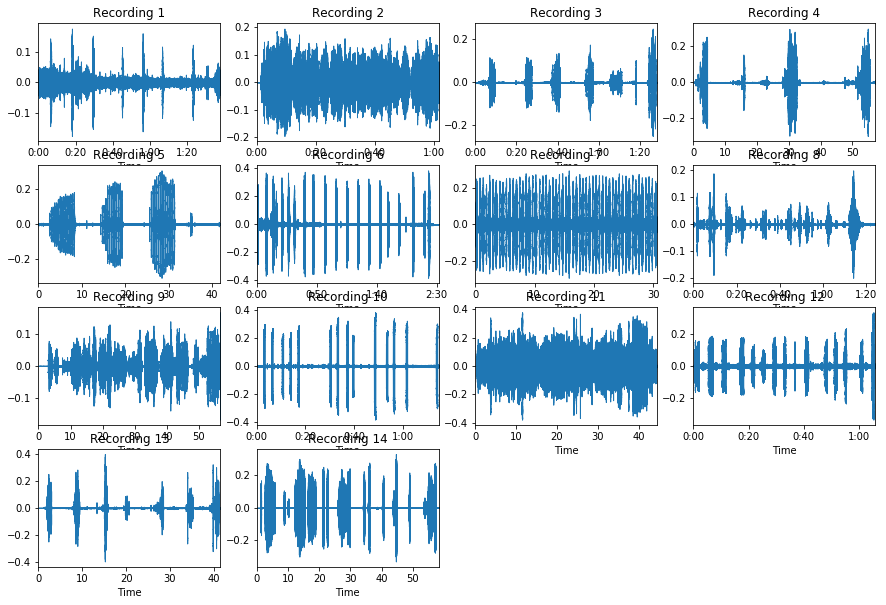

In [42]:
plt.figure(figsize=(15, 10))
for i in range(14):
    plt.subplot(4, 4, i+1)
    y, sr = librosa.load('Test Birds from Kasios/'+str(i+1)+'.wav')
    librosa.display.waveplot(y, sr)
    plt.title('Recording '+str(i+1))



# Litterature

In Automated bird sound recognition in realistic by Timos Papadopoulos, birds sound classification is done in this way:
- preprocessing and feature extraction: FFT-based spectogram ( with a frame length of 20ms, overlap of 50% and rectangular window, only the bins corresponding to frequencies between 1kHz and 10kHz are kept) - power threshold method to keep only most energetic frame ( more prone to contain mostly bird sounds )

- used two types of classification: kNN with histogram-based feature and SVM with time-mesuration features

# Spectogram

We use an amplitude to decibel transformation, to see more clearly

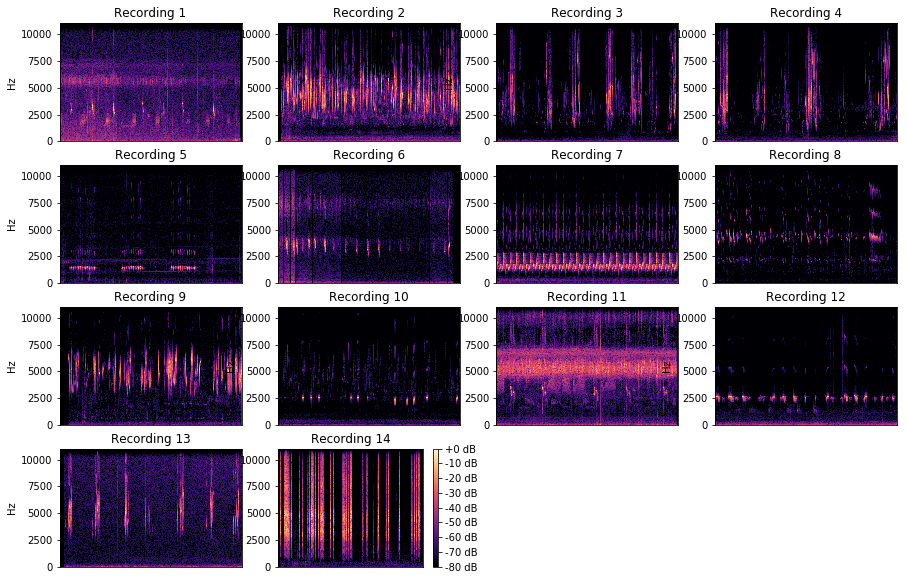

In [21]:
plt.figure(figsize=(15, 10))
for i in range(14):
    plt.subplot(4, 4, i+1)
    y, sr = librosa.load('Test Birds from Kasios/'+str(i+1)+'.wav')
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max) #db-scaled specrogram
    librosa.display.specshow(D, y_axis='linear')
    plt.title('Recording '+str(i+1))

plt.colorbar(format='%+2.0f dB')

In [94]:
birds_name = birds['English_name'].unique()
chosen_birds=[]
for bird_type in birds_name:
    possible_birds = birds[(birds['Quality']=='A')&(birds['English_name']==bird_type)]
    bird_type=bird_type.replace(' ','-')
    chosen_index = birds['File ID'].tolist()[0]
    chosen_birds.append(bird_type+'-'+ str(chosen_index))